# Import Library

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Data Loading

In [8]:
test = pd.read_csv(r"D:\UB\Dicoding\GitHub\Dicoding_Akmal\Machine Learning\house-prices-advanced-regression-techniques\test.csv")
test.head()

train = pd.read_csv(r"D:\UB\Dicoding\GitHub\Dicoding_Akmal\Machine Learning\house-prices-advanced-regression-techniques\train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleaning

In [9]:
train.info()
train.describe(include="all")

# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

# Memisahkan kolom dengan jumlah nilai yang hilang yang lebih kecil dari 1000 dan lebih besar dari 1000
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = train[less].select_dtypes(include=['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori
kategorical_features = train[less].select_dtypes(include=['object']).columns
 
for column in kategorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])
    
# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = train.drop(columns=over)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
print(missing_values)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64


In [11]:
# Memeriksa apakah ada outlier
for feature in numeric_features:
    Q1 = df[numeric_features].quantile(0.25)
    Q3 = df[numeric_features].quantile(0.75)
    IQR = Q3 - Q1 
    
    # Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
    condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
    df_filtered_numeric = df.loc[condition, numeric_features]
    
    # Menggabungkan kembali dengan kolom kategorikal
    categorical_features = df.select_dtypes(include=['object']).columns
    df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)  
    
    # Jika tidak ingin menghapus outlier, bisa menggunakan code agregasi berikut:
    # ```
    # median = df['column_name'].median()
    # df['column_name'] = df['column_name'].apply(lambda x: median if x < (Q1 - 1.5  IQR) or x > (Q3 + 1.5  IQR) else x)
    # ```  
    # Atau
    # ```
    # # Mengganti outlier dengan nilai batas terdekat
    # df['column_name'] = df['column_name'].apply(lambda x: (Q1 - 1.5  IQR) if x < lower_bound else (Q3 + 1.5  IQR) if x > (Q3 + 1.5 * IQR) else x)
    # ```                       

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

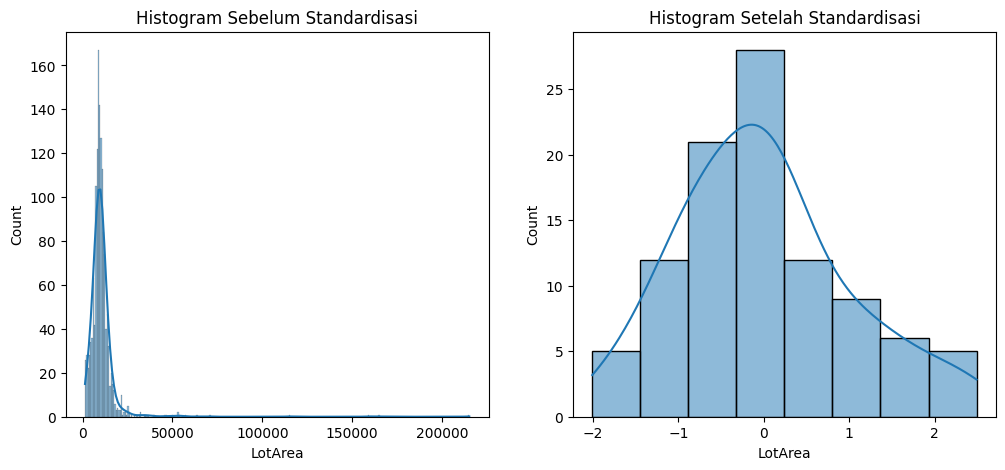

In [17]:
# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

# Histogram Setelah Standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

In [19]:
# Mengidentifikasi baris duplikat
duplicates = df.duplicated()
 
print("Baris duplikat:")
print(df[duplicates])

# Menghapus baris duplikat
df = df.drop_duplicates()
 
print("DataFrame setelah menghapus duplikat:")
print(df)

Baris duplikat:
Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 77 columns]
DataFrame setelah mengha

# Data Encoding/ Transformation


In [20]:
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
67,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
96,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
111,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,BuiltIn,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,...,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,WD,Normal
1390,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1401,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
1444,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


In [23]:
# One hot encoding
df_one_hot = pd.get_dummies(df, columns=category_features)
df_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_Y,SaleType_Con,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,-1.837083,0.555216,-0.705204,-0.480828,0.457364,0.0,0.374047,0.313355,1.710750,0.977548,...,False,True,True,True,False,False,True,False,True,False
2,-1.832229,0.555216,-0.132469,2.334116,0.457364,0.0,-0.054685,0.092428,1.292447,0.415568,...,False,True,True,True,False,False,True,False,True,False
67,-1.674501,-1.423371,0.631177,1.745994,0.457364,0.0,0.374047,0.313355,1.353962,1.761766,...,False,True,True,True,False,False,True,False,True,False
96,-1.604129,-1.423371,1.776647,1.342853,0.457364,0.0,-0.483417,-0.570351,1.550810,2.142380,...,False,True,True,True,False,False,True,False,True,False
111,-1.567730,1.544509,0.058442,-1.184564,0.457364,0.0,-0.269051,-0.349425,-0.700645,-0.187283,...,False,True,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,1.509195,1.544509,0.822089,0.811030,-2.862762,0.0,1.017145,1.197061,-0.700645,-0.825897,...,False,True,True,True,False,False,True,False,True,False
1390,1.535887,-1.423371,0.249354,0.172641,0.457364,0.0,-0.269051,-0.349425,2.301296,2.750340,...,False,True,True,True,False,False,True,False,True,False
1401,1.562580,0.555216,-1.277939,-1.521352,-1.202699,0.0,0.588413,0.534281,-0.700645,1.112935,...,False,True,True,True,False,False,True,False,True,False
1444,1.666924,-1.423371,-1.087028,-0.430561,0.457364,0.0,0.588413,0.534281,0.603477,-0.825897,...,False,True,True,True,False,False,True,False,True,False


In [24]:
# Label Encoding
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)
 
for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])
 
# Menampilkan hasil
df_lencoder

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.837083,0.555216,-0.705204,-0.480828,0.457364,0.0,0.374047,0.313355,1.710750,0.977548,...,0,0,1,0,1,0,0,0,2,1
2,-1.832229,0.555216,-0.132469,2.334116,0.457364,0.0,-0.054685,0.092428,1.292447,0.415568,...,0,0,2,0,1,0,0,0,2,1
67,-1.674501,-1.423371,0.631177,1.745994,0.457364,0.0,0.374047,0.313355,1.353962,1.761766,...,0,0,1,0,1,0,0,0,2,1
96,-1.604129,-1.423371,1.776647,1.342853,0.457364,0.0,-0.483417,-0.570351,1.550810,2.142380,...,0,0,1,0,1,0,0,0,2,1
111,-1.567730,1.544509,0.058442,-1.184564,0.457364,0.0,-0.269051,-0.349425,-0.700645,-0.187283,...,1,0,2,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,1.509195,1.544509,0.822089,0.811030,-2.862762,0.0,1.017145,1.197061,-0.700645,-0.825897,...,0,0,1,1,0,0,0,0,2,1
1390,1.535887,-1.423371,0.249354,0.172641,0.457364,0.0,-0.269051,-0.349425,2.301296,2.750340,...,0,0,1,0,1,0,0,0,2,1
1401,1.562580,0.555216,-1.277939,-1.521352,-1.202699,0.0,0.588413,0.534281,-0.700645,1.112935,...,1,0,2,0,0,0,0,0,2,1
1444,1.666924,-1.423371,-1.087028,-0.430561,0.457364,0.0,0.588413,0.534281,0.603477,-0.825897,...,0,0,1,0,1,0,0,0,2,1


# EDA

In [26]:
df_lencoder.head()

# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100
 
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)
 
missing_data[missing_data['Missing Values'] > 0]  # Menampilkan kolom dengan missing values

,Missing Values,Percentage


In [ ]:
# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]
 
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris
 
# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
 
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
 
# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

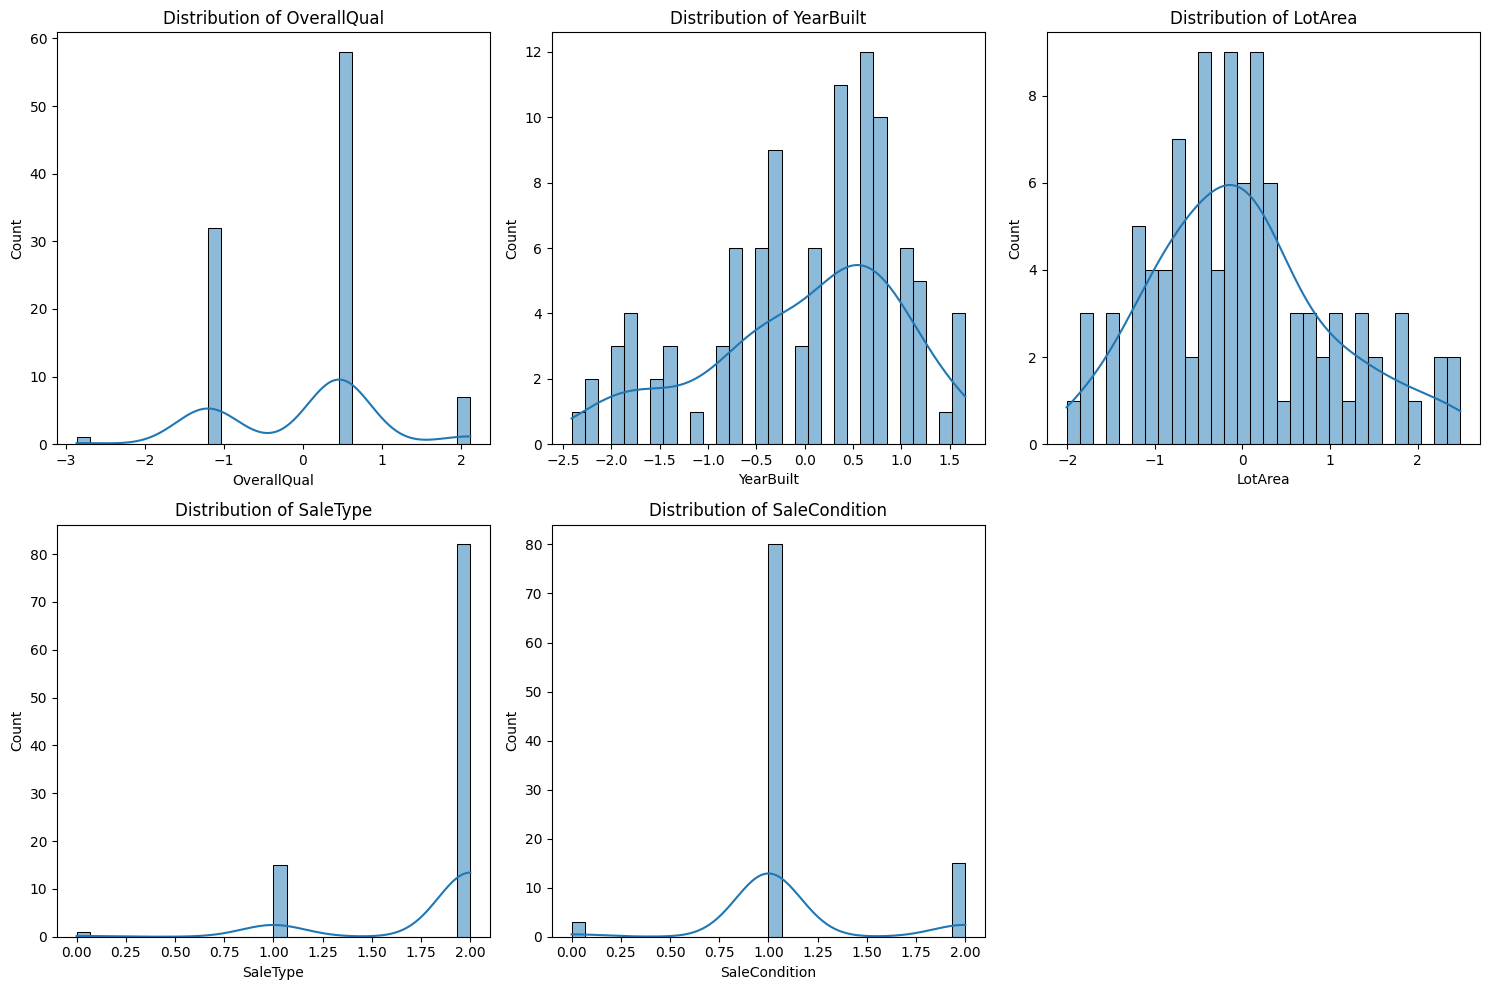

In [28]:
# Visualisasi distribusi data untuk beberapa kolom
columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']
 
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_lencoder[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
 
plt.tight_layout()
plt.show()

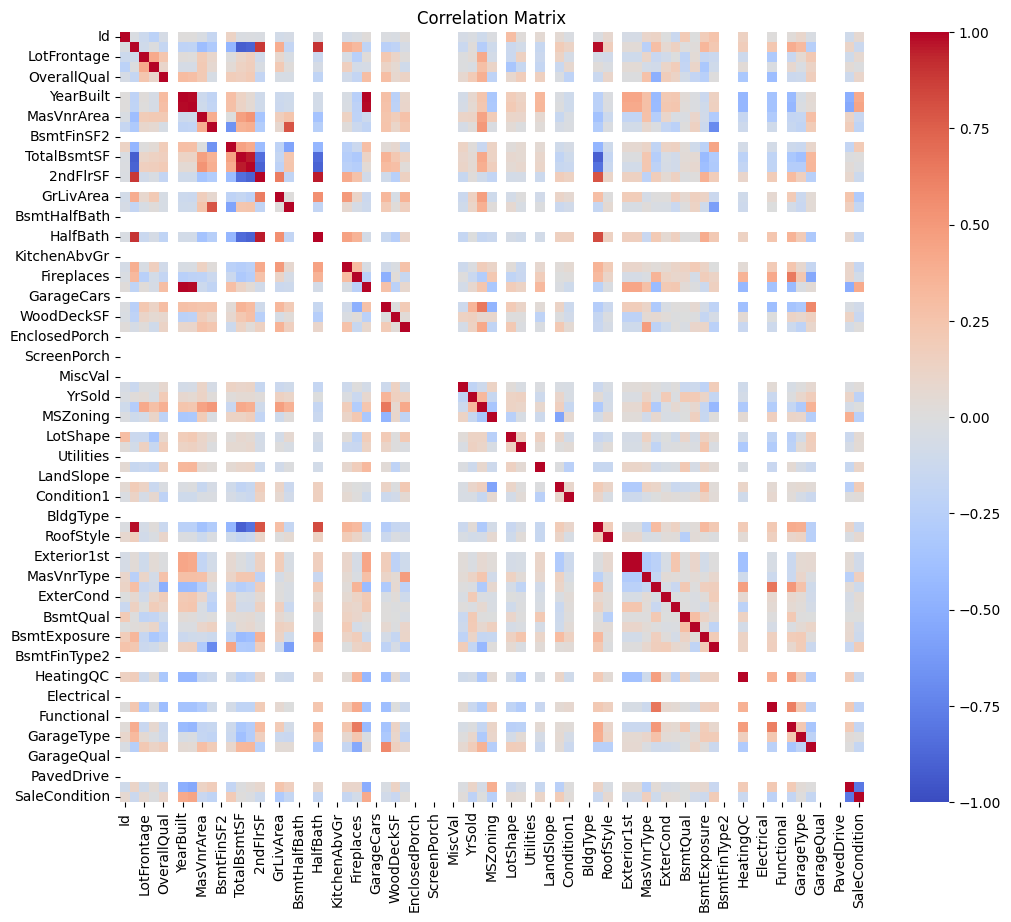

In [29]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()
 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

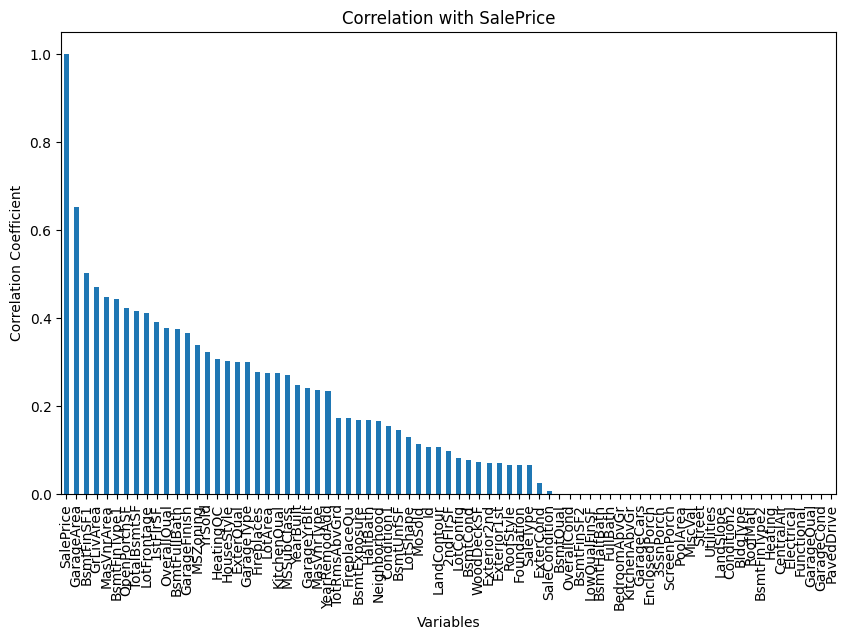

In [30]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lencoder.corr()['SalePrice']
 
# (Opsional) Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
 
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

# Data Splitting

In [32]:
# Memisahkan fitur (X) dan target (y)
X = df_lencoder.drop(columns=['SalePrice'])  
y = df_lencoder['SalePrice'] 

In [34]:
# membagi dataset menjadi training dan testing 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
# menghitung panjang/jumlah data 
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  98
Jumlah data latih:  78
Jumlah data test:  20


# Pengembangan Model

In [36]:
# Melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)
 
# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)
 
# Melatih model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=184)

Evaluasi Model

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
# Evaluasi pada model LARS
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)
 
# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}
 
# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.81768,1.146272,-0.016373


In [ ]:
# Evaluasi pada model Linear Regression
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)
 
# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.817680,1.146272,-0.016373
Linear Regression,0.420921,0.271237,0.759501


In [ ]:
  # Evaluasi pada model GRR
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)
 
# Menambahkan hasil evaluasi LR ke DataFrame
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results


,MAE,MSE,R2
Lars,0.817680,1.146272,-0.016373
Linear Regression,0.420921,0.271237,0.759501
GradientBoostingRegressor,0.495686,0.404297,0.641519


Menyimpan model

In [40]:
import joblib
 
# Menyimpan model ke dalam file
joblib.dump(GBR, 'gbr_model.joblib')

['gbr_model.joblib']

# Monitoring dan Evaluasi

In [43]:
# Memuat model dari file joblib
joblib_model = joblib.load('gbr_model.joblib')

# Menyimpan model ke dalam file pickle jika belum ada
import pickle
with open('gbr_model.pkl', 'wb') as file:
    pickle.dump(GBR, file)

# Memuat model dari file pickle
with open('gbr_model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)

In [1]:
from flask import Flask, request, jsonify
import joblib
 
# Inisialisasi aplikasi Flask
app = Flask(__name__)
 
# Memuat model yang telah disimpan
joblib_model = joblib.load('gbr_model.joblib') # Pastikan path file sesuai dengan penyimpanan Anda
 
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['data']  # Mengambil data dari request JSON
    prediction = joblib_model.predict(data)  # Melakukan prediksi (harus dalam bentuk 2D array)
    return jsonify({'prediction': prediction.tolist()})
 
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

d:\UB\Dicoding\GitHub\Dicoding_Akmal\.venv\lib\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
